In [ ]:
from math import * # вкл. в себя ключает математические функции и константы
import itertools # используется для работы с итерациями
import pandas as pd # для анализа данных
import seaborn as sns # для визуализации данных на основе Matplotlib
import numpy as np # для работы с многомерными массивами
import matplotlib.pyplot as plt # для создания визуализаций
import warnings # модуль для управления предупреждениями (сделан вывод более чистым)
warnings.filterwarnings("ignore")

'\nfrom statsmodels.graphics.tsaplots import plot_acf, plot_pacf # ф-ции для построения графиков АКФ и ЧАКФ\nfrom statsmodels.tsa.arima.model import ARIMA # для работы с моделями временных рядов, построение ARIMA\n# функции для оценки производительности моделей машинного обучения (для нашего случая - MAPE)\nfrom sklearn.metrics import mean_absolute_percentage_error\n'

In [ ]:
# Чтение данных таблицы
df_d=pd.read_excel('C:/Users/user/Desktop/Курсовая/Таблицы датасеты/Доллар табл.xlsx')

In [ ]:
# Создаем индекс из даты
df_d['data'] = pd.to_datetime(df_d['data'])
# Устанавливаем data как индекс
df_d.set_index('data', inplace=True)
# Сортировка датафреймов по индексу (по датам) в порядке возрастания
df_d.sort_index(ascending=True, inplace=True)

# Анализ данных. Выявление пропущенных значений и устранение выбросов

In [ ]:
df_d.info()
df_d.describe() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744 entries, 2010-02-02 to 2025-03-22
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nominal            3744 non-null   int64  
 1   curs usd           3744 non-null   float64
 2   name of cur        3744 non-null   object 
 3   gold               3744 non-null   float64
 4   silver             3744 non-null   float64
 5   palladium          3744 non-null   float64
 6   key interest rate  3013 non-null   float64
 7   inflation          3013 non-null   float64
 8   curs eur           3744 non-null   float64
 9   brent (in usd)     3744 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 321.8+ KB


,nominal,curs usd,gold,silver,palladium,key interest rate,inflation,curs eur,brent (in usd)
count,3744.0,3744.000000,3744.000000,3744.000000,3744.000000,3013.000000,3013.000000,3744.000000,3744.000000
mean,1.0,58.449740,3086.885377,41.000705,2360.349880,0.093931,0.071310,67.437285,78.346544
std,0.0,21.081743,1793.342409,19.410551,1758.869232,0.042175,0.039933,20.560472,24.535456
min,1.0,27.262500,1030.700000,14.780000,379.080000,0.042500,0.022000,37.420600,19.330000
25%,1.0,32.978700,1652.715000,29.967500,779.547500,0.070000,0.041000,44.031575,58.530000
50%,1.0,62.485750,2578.620000,33.285000,1723.740000,0.077500,0.062700,70.138600,76.370000
75%,1.0,73.232000,4151.960000,52.875000,3564.660000,0.110000,0.084000,82.968950,102.797500
max,1.0,120.378500,9303.760000,107.420000,11366.940000,0.210000,0.178300,132.958100,127.980000


В процессе анализа столбцов таблицы дадасета выявлено, что есть пропущенные значения в столбцах ключевой ставки (key interest rate) и инфляции (inflation). Поэтому, пропущенные значения будут заполнены методом ffill + интерполяцией для ключ. ставки и минтерполяцией для инфляции 

In [ ]:
df_d['key interest rate'].fillna(method='bfill', inplace=True) # заполнение первым известным значением
df_d['key interest rate'] = df_d['key interest rate'].interpolate(method='linear') # интерполяция для ключевой ставки
df_d['inflation'].fillna(method='bfill', inplace=True)
df_d['inflation'] = df_d['inflation'].interpolate(method='linear') # интерполяция для инфляции

In [ ]:
df_d.head(20)

,nominal,curs usd,name of cur,gold,silver,palladium,key interest rate,inflation,curs eur,brent (in usd)
data,,,,,,,,,,
2010-02-02,1,30.3996,Доллар США,1057.51,15.92,409.52,0.055,0.06,42.2190,78.11
2010-02-03,1,30.1830,Доллар США,1081.03,15.75,421.16,0.055,0.06,42.0510,78.87
2010-02-04,1,29.8779,Доллар США,1074.43,16.12,428.43,0.055,0.06,41.7633,78.57
2010-02-05,1,30.0054,Доллар США,1063.58,16.20,414.82,0.055,0.06,41.6115,78.71
2010-02-06,1,30.4666,Доллар США,1030.70,15.80,379.08,0.055,0.06,41.7179,80.77
2010-02-09,1,30.5158,Доллар США,1049.78,14.88,398.33,0.055,0.06,41.6937,82.31
2010-02-10,1,30.3735,Доллар США,1042.93,14.78,400.38,0.055,0.06,41.6998,83.75
2010-02-11,1,30.2462,Доллар США,1045.86,14.78,404.53,0.055,0.06,41.6551,83.28
2010-02-12,1,30.1245,Доллар США,1045.52,15.11,402.91,0.055,0.06,41.5085,84.84


In [ ]:
df_d.tail(20)

,nominal,curs usd,name of cur,gold,silver,palladium,key interest rate,inflation,curs eur,brent (in usd)
data,,,,,,,,,,
2025-02-25,1,88.2065,Доллар США,8320.96,93.39,2773.51,0.21,0.1006,92.5162,74.31
2025-02-26,1,86.6318,Доллар США,8166.15,90.55,2657.15,0.21,0.1006,90.9403,73.02
2025-02-27,1,85.9279,Доллар США,8103.53,88.81,2588.60,0.21,0.1006,90.1826,72.53
2025-02-28,1,87.6967,Доллар США,8179.41,89.42,2619.33,0.21,0.1006,92.0362,74.04
2025-03-01,1,88.2568,Доллар США,8174.33,90.02,2616.19,0.21,0.1006,91.5655,73.18
2025-03-04,1,89.2497,Доллар США,8133.58,89.34,2634.15,0.21,0.1006,92.8530,71.62
2025-03-05,1,89.2448,Доллар США,8265.55,90.45,2697.13,0.21,0.1006,93.9034,71.04
2025-03-06,1,89.7878,Доллар США,8388.59,92.10,2730.86,0.21,0.1006,95.7035,69.30
2025-03-07,1,89.5724,Доллар США,8389.63,92.89,2709.91,0.21,0.1006,96.5975,69.46


In [ ]:
# смотрим информацию о датафрейме после замены пропущ. значений
df_d.info()
df_d.describe() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744 entries, 2010-02-02 to 2025-03-22
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nominal            3744 non-null   int64  
 1   curs usd           3744 non-null   float64
 2   name of cur        3744 non-null   object 
 3   gold               3744 non-null   float64
 4   silver             3744 non-null   float64
 5   palladium          3744 non-null   float64
 6   key interest rate  3744 non-null   float64
 7   inflation          3744 non-null   float64
 8   curs eur           3744 non-null   float64
 9   brent (in usd)     3744 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 321.8+ KB


,nominal,curs usd,gold,silver,palladium,key interest rate,inflation,curs eur,brent (in usd)
count,3744.0,3744.000000,3744.000000,3744.000000,3744.000000,3744.00000,3744.000000,3744.000000,3744.000000
mean,1.0,58.449740,3086.885377,41.000705,2360.349880,0.08633,0.069102,67.437285,78.346544
std,0.0,21.081743,1793.342409,19.410551,1758.869232,0.04086,0.036102,20.560472,24.535456
min,1.0,27.262500,1030.700000,14.780000,379.080000,0.04250,0.022000,37.420600,19.330000
25%,1.0,32.978700,1652.715000,29.967500,779.547500,0.05500,0.046000,44.031575,58.530000
50%,1.0,62.485750,2578.620000,33.285000,1723.740000,0.07500,0.060000,70.138600,76.370000
75%,1.0,73.232000,4151.960000,52.875000,3564.660000,0.10000,0.080300,82.968950,102.797500
max,1.0,120.378500,9303.760000,107.420000,11366.940000,0.21000,0.178300,132.958100,127.980000


In [ ]:
df_d = df_d.drop(columns=['nominal']) # удаляем столбец с номиналом (там везде 1)
df_d = df_d.drop(columns=['name of cur']) # удаляем столбец с наименованием валюты (везде 'доллар')

Проверим значение столбцов на выбросы

В дальнейшем у нас будет 2 датафрейма: 

df_d1 - для работы с значениями без выбросов

df_d2 - выбросы остаются

Потом мы сравним результаты прогноза в каждом из случаев

In [ ]:
df_d1 = df_d.copy()
df_d2 = df_d.copy()

Для начала изобразим динамику изменения цены (для курса доллара, цены на драг. металлы, нефть, курс евро)

In [ ]:
# Готовим "обрезанные" датафреймы для проверки 
df_d_check1 = df_d1[['curs usd', 'gold', 'silver', 'palladium', 'brent (in usd)', 'curs eur']] # проверяем цены
df_d_check2 = df_d1[['key interest rate', 'inflation']] # проверяем ключ. ставку и инфляцию

In [ ]:
'''
for col in df_d_check1.columns:
    plt.figure(figsize=(15, 10))
    plt.plot(df_d_check1.index, df_d_check1[col], label=col)
    plt.title(f'Динамика изменения цены {col}')
    plt.xlabel('Дата')
    plt.ylabel('Цена')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
'''

"\nfor col in df_d_check1.columns:\n    plt.figure(figsize=(15, 10))\n    plt.plot(df_d_check1.index, df_d_check1[col], label=col)\n    plt.title(f'Динамика изменения цены {col}')\n    plt.xlabel('Дата')\n    plt.ylabel('Цена')\n    plt.legend()\n    plt.grid(True)\n    plt.tight_layout()\n    plt.show()\n"

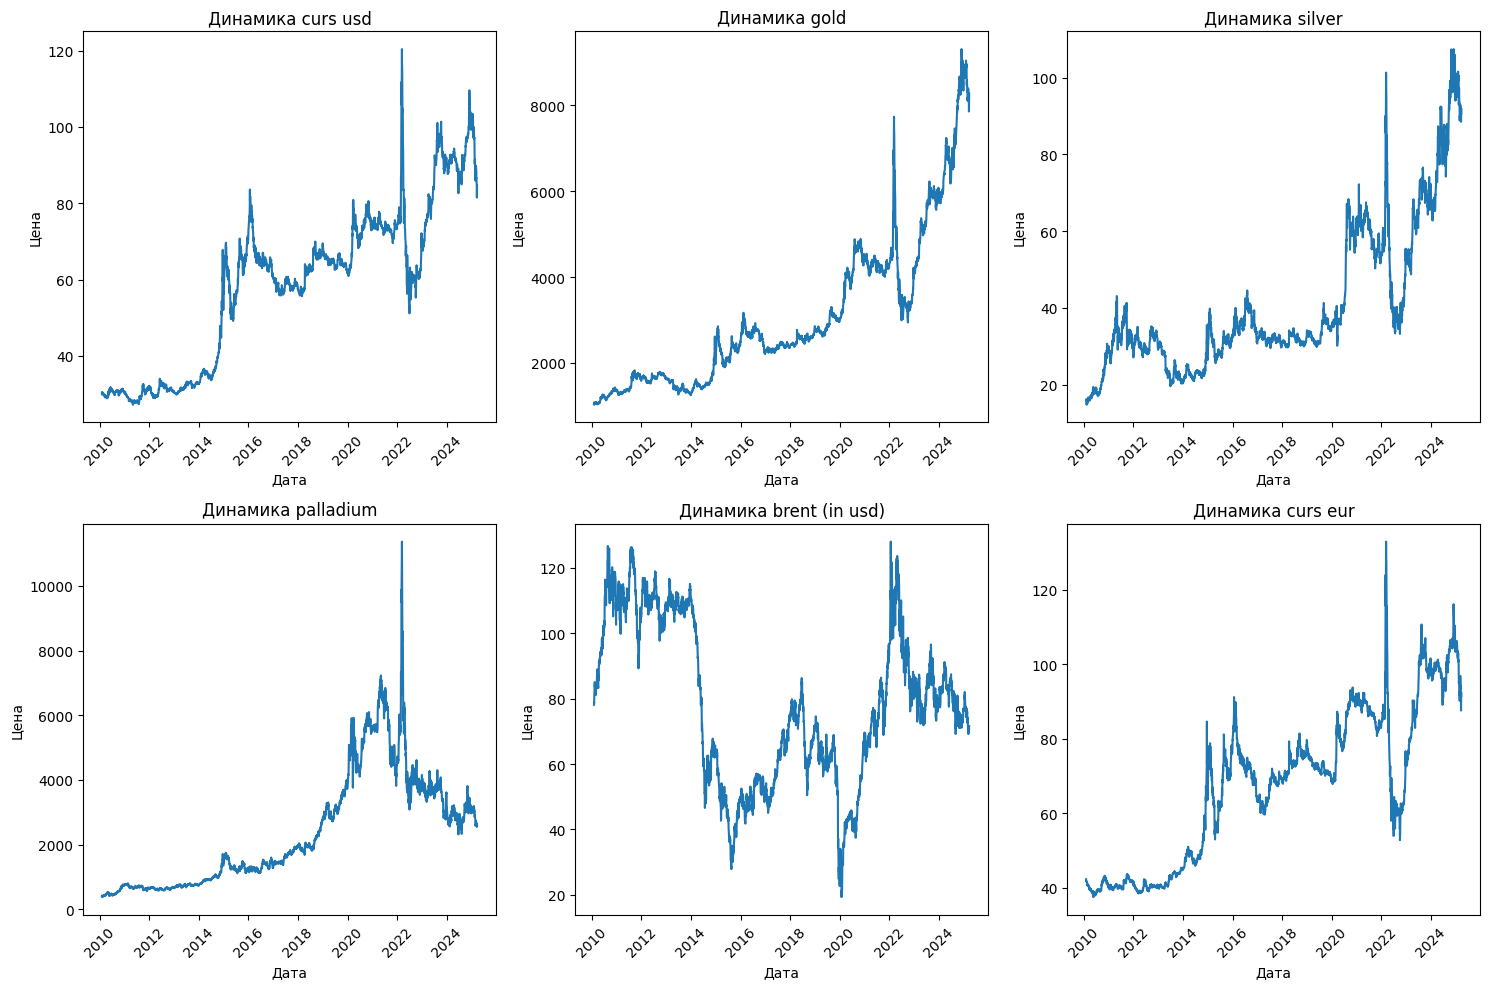

In [ ]:
# Графики 6 в 1
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_d_check1.columns, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=df_d_check1.index, y=df_d_check1[col])
    plt.title(f'Динамика {col}')
    plt.xlabel('Дата')
    plt.ylabel('Цена')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Выведена динамика цены для курса доллара, цены на драг. металлы, нефть, курс евро. Ниже динамика ключевой ставки и инфляции

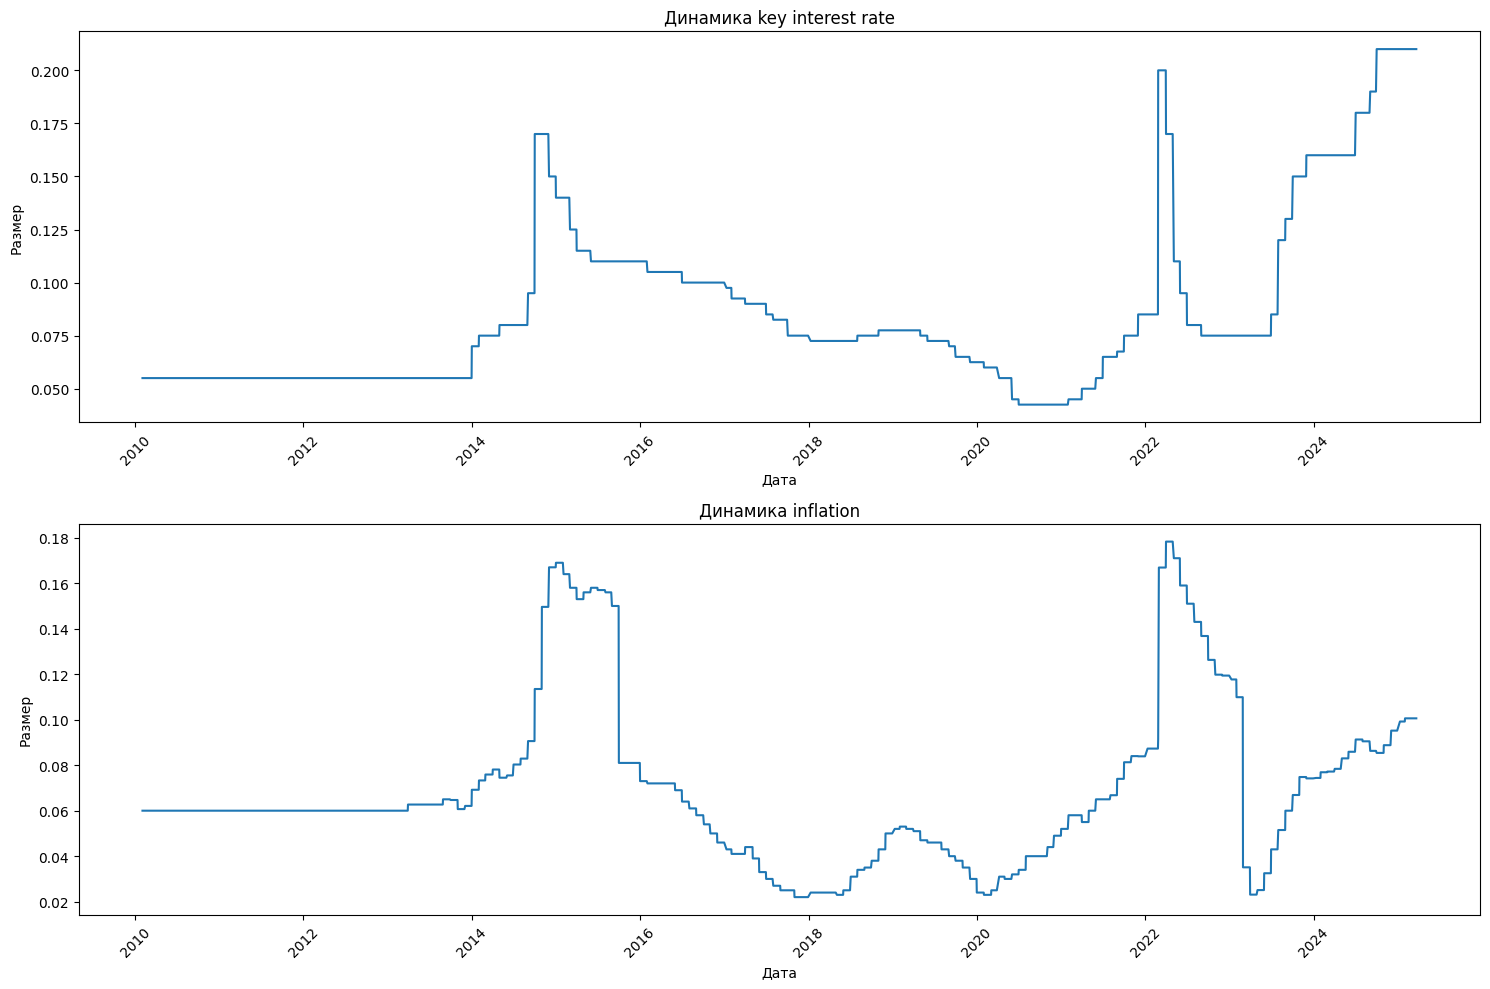

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_d_check2.columns, 1):
    plt.subplot(2, 1, i)
    sns.lineplot(x=df_d_check2.index, y=df_d_check2[col])
    plt.title(f'Динамика {col}')
    plt.xlabel('Дата')
    plt.ylabel('Размер')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Мы получили динамику изменения цен, инфляции и т.п. Теперь строим графики ящики с усами, чтоб визуально ознакомится с выбросами в нашем наборе данных

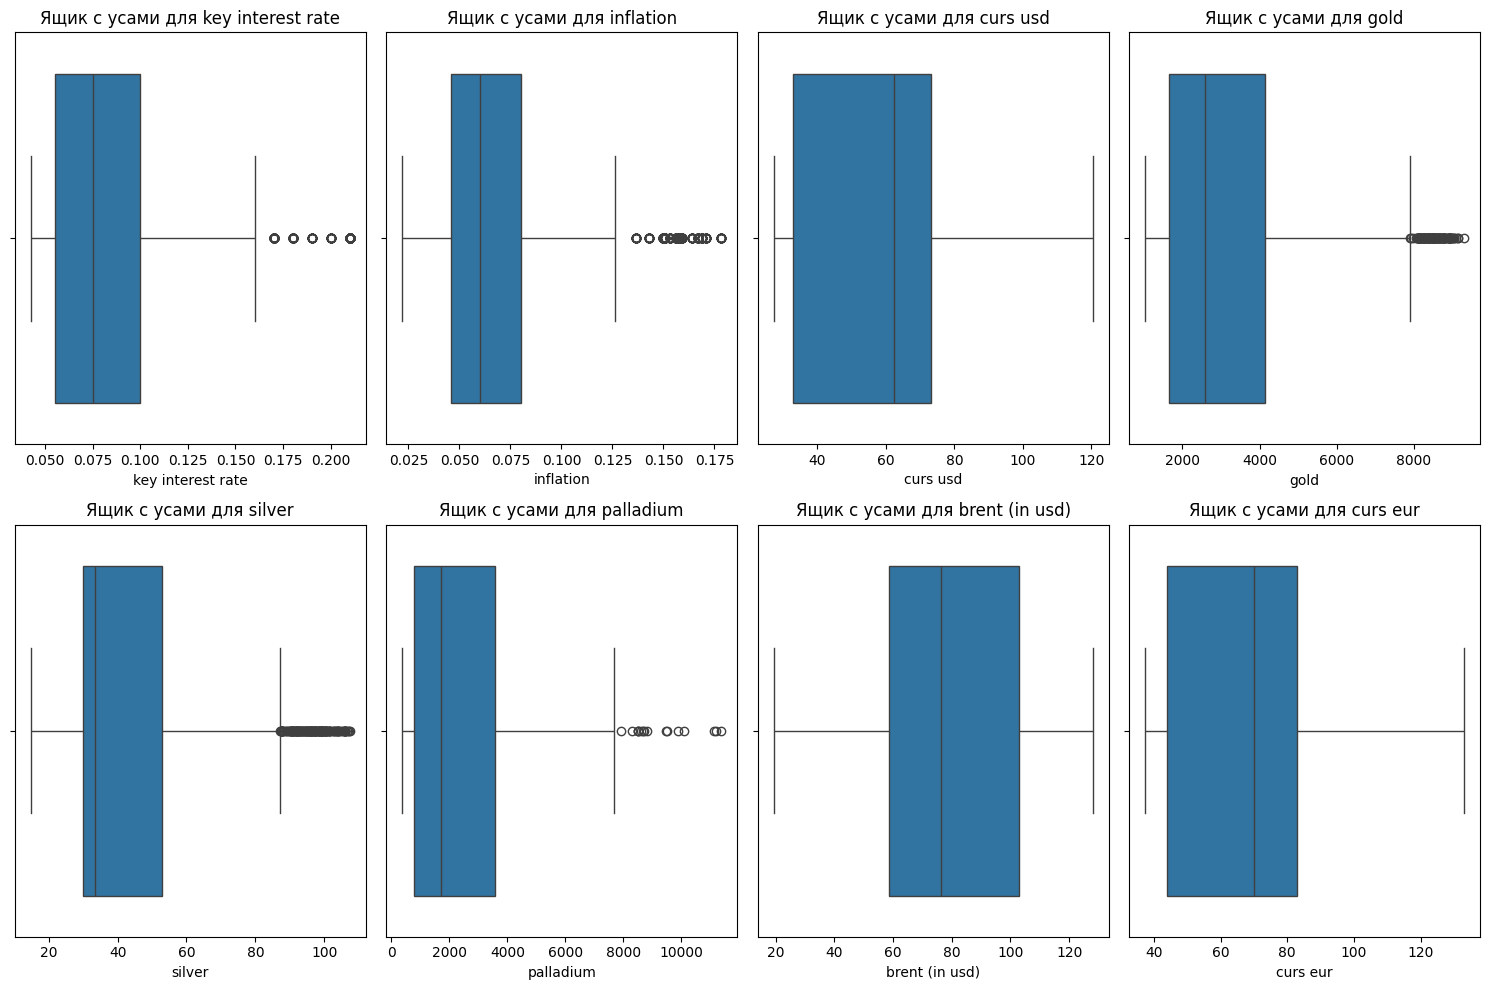

In [ ]:
# Создаем общую фигуру с размером 15x10
plt.figure(figsize=(15, 10))
# Первые 2 графика (для ключевой ставки и инфляции)
for i, col in enumerate(df_d_check2.columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df_d_check2[col])
    plt.title(f'Ящик с усами для {col}')
# Остальные 6 графиков (для цен)
for i, col in enumerate(df_d_check1.columns, 1):
    plt.subplot(2, 4, i + 2)
    sns.boxplot(x=df_d_check1[col])
    plt.title(f'Ящик с усами для {col}')
plt.tight_layout()
plt.show()

Проверка выбросов с помощью интервала (m-3s,m+3s) - это интервал сред. квадратического отклонения. Все, что не попадает в этот интервал - это выбросы

m - сред. знач. признака .mean()

s - отклонение признака .std()

In [ ]:
# Проверка выбросов для курса доллара
Mcd = df_d1['curs usd'].mean() # ср. знач
Scd = df_d1['curs usd'].std() # cр. кв. отклонение
print(f"Значение курса доллара не считается выбросом на интервале ({Mcd-3*Scd}, {Mcd+3*Scd})")

# Проверка выбросов для цены на золото
Mg = df_d1['gold'].mean()
Sg = df_d1['gold'].std()
print(f"Значение цены золота не считается выбросом на интервале ({Mg-3*Sg}, {Mg+3*Sg})")

# Проверка выбросов для цены на серебро
Mss = df_d1['silver'].mean()
Sss = df_d1['silver'].std()
print(f"Значение цены серебра не считается выбросом на интервале ({Mss-3*Sss}, {Mss+3*Sss})")

# Проверка выбросов для цены на палладий
Mpp = df_d1['palladium'].mean()
Spp = df_d1['palladium'].std()
print(f"Значение цены палладия не считается выбросом на интервале ({Mpp-3*Spp}, {Mpp+3*Spp})")

# Проверка выбросов для цены на нефть Brent
Mb = df_d1['brent (in usd)'].mean()
Sb = df_d1['brent (in usd)'].std()
print(f"Значение цены на нефть Brent не считается выбросом на интервале ({Mb-3*Sb}, {Mb+3*Sb})")

# Проверка выбросов для курса евро
Mce = df_d1['curs eur'].mean()
Sce = df_d1['curs eur'].std()
print(f"Значение курса доллара не считается выбросом на интервале ({Mce-3*Sce}, {Mce+3*Sce})")

# Проверка выбросов для кл. ставки
Mkir = df_d1['key interest rate'].mean()
Skir = df_d1['key interest rate'].std()
print(f"Значение ключевой ставки не считается выбросом на интервале ({Mkir-3*Skir}, {Mkir+3*Skir})")

# Проверка выбросов для инфляции
Minf = df_d1['inflation'].mean()
Sinf = df_d1['inflation'].std()
print(f"Значение инфляции не считается выбросом на интервале ({Minf-3*Sinf}, {Minf+3*Sinf})")

Значение курса доллара не считается выбросом на интервале (-4.795489312952874, 121.69497024244006)
Значение цены золота не считается выбросом на интервале (-2293.1418498774974, 8466.912603082626)
Значение цены серебра не считается выбросом на интервале (-17.23094780584824, 99.2323580622585)
Значение цены палладия не считается выбросом на интервале (-2916.2578152355823, 7636.957574850967)
Значение цены на нефть Brent не считается выбросом на интервале (4.7401748355824225, 151.95291277125517)
Значение курса доллара не считается выбросом на интервале (5.755870099920848, 129.118699771874)
Значение ключевой ставки не считается выбросом на интервале (-0.03625050183608208, 0.20891075824633848)
Значение инфляции не считается выбросом на интервале (-0.03920306007589709, 0.1774072801613672)


Метод IQR

a - 25ая процентиль признака

b - 75ая процентиль признака

Построить интервал [a-1.5(b-a),b+1.5(b-a)] - это интервал сред. квадратического отклонения. Все объекты, значения признака которых не попадает в этот интервал - объявляются выбросами

In [ ]:
# Проверка выбросов для курса доллара
Q1_usd = df_d1['curs usd'].quantile(0.25)
Q3_usd = df_d1['curs usd'].quantile(0.75)
IQR_usd = Q3_usd - Q1_usd
print(f"Значение курса доллара не считается выбросом на интервале ({Q1_usd-1.5*IQR_usd}, {Q3_usd+1.5*IQR_usd})")

# Проверка выбросов для цены на золото
Q1_gold = df_d1['gold'].quantile(0.25)
Q3_gold = df_d1['gold'].quantile(0.75)
IQR_gold = Q3_gold - Q1_gold
print(f"Значение цены золота не считается выбросом на интервале ({Q1_gold-1.5*IQR_gold}, {Q3_gold+1.5*IQR_gold})")

# Проверка выбросов для цены на серебро
Q1_silver = df_d1['silver'].quantile(0.25)
Q3_silver = df_d1['silver'].quantile(0.75)
IQR_silver = Q3_silver - Q1_silver
print(f"Значение цены серебра не считается выбросом на интервале ({Q1_silver-1.5*IQR_silver}, {Q3_silver+1.5*IQR_silver})")

# Проверка выбросов для цены на палладий
Q1_palladium = df_d1['palladium'].quantile(0.25)
Q3_palladium = df_d1['palladium'].quantile(0.75)
IQR_palladium = Q3_palladium - Q1_palladium
print(f"Значение цены палладия не считается выбросом на интервале ({Q1_palladium-1.5*IQR_palladium}, {Q3_palladium+1.5*IQR_palladium})")

# Проверка выбросов для цены на нефть Brent
Q1_brent = df_d1['brent (in usd)'].quantile(0.25)
Q3_brent = df_d1['brent (in usd)'].quantile(0.75)
IQR_brent = Q3_brent - Q1_brent
print(f"Значение цены на нефть Brent не считается выбросом на интервале ({Q1_brent-1.5*IQR_brent}, {Q3_brent+1.5*IQR_brent})")

# Проверка выбросов для курса евро
Q1_eur = df_d1['curs eur'].quantile(0.25)
Q3_eur = df_d1['curs eur'].quantile(0.75)
IQR_eur = Q3_eur - Q1_eur
print(f"Значение курса евро не считается выбросом на интервале ({Q1_eur-1.5*IQR_eur}, {Q3_eur+1.5*IQR_eur})")

# Проверка выбросов для кл. ставки
Q1_keyrate = df_d1['key interest rate'].quantile(0.25)
Q3_keyrate = df_d1['key interest rate'].quantile(0.75)
IQR_keyrate = Q3_keyrate - Q1_keyrate
print(f"Значение ключевой ставки не считается выбросом на интервале ({Q1_keyrate-1.5*IQR_keyrate}, {Q3_keyrate+1.5*IQR_keyrate})")

# Проверка выбросов для инфляции
Q1_inf = df_d1['inflation'].quantile(0.25)
Q3_inf = df_d1['inflation'].quantile(0.75)
IQR_inf = Q3_inf - Q1_inf
print(f"Значение инфляции не считается выбросом на интервале ({Q1_inf-1.5*IQR_inf}, {Q3_inf+1.5*IQR_inf})")

Значение курса доллара не считается выбросом на интервале (-27.40125000000001, 133.61195)
Значение цены золота не считается выбросом на интервале (-2096.1525, 7900.827499999999)
Значение цены серебра не считается выбросом на интервале (-4.393749999999997, 87.23625)
Значение цены палладия не считается выбросом на интервале (-3398.1212499999997, 7742.32875)
Значение цены на нефть Brent не считается выбросом на интервале (-7.871250000000003, 169.19875000000002)
Значение курса евро не считается выбросом на интервале (-14.3744875, 141.37501250000003)
Значение ключевой ставки не считается выбросом на интервале (-0.012500000000000004, 0.1675)
Значение инфляции не считается выбросом на интервале (-0.0054499999999999965, 0.13174999999999998)


Далее необходимо что-то сделать с выбросами. Финансовые данные имеют "тяжелые хвосты", так же видно, что метод 1-ый сетод поиска выбросов дает нереалистичные отрицательные границы для некоторых показателей. 2-ой метод посика выбросов, использующий квартили, более устойчив к выбросам при расчете границ. Поэтому дальше будем работать, основываясь на данных из 2-ого метода поиска выбросов

У нас не самый большой датафрейм, поэтому будем выбросы усреднять

In [ ]:
# Заменяем выбросы в цене золота на значение медианы
# Относительно остальных драг. металлов, золото обладает наибольшей стабильностью в плане изменения цены
# Поэтому все выбросы в цене золота заменены на медиану
lower_gold = Q1_gold - 1.5 * IQR_gold
upper_gold = Q3_gold + 1.5 * IQR_gold
gold_median = df_d1['gold'].median() # медиана
df_d1['gold'] = np.where( # Заменяем выбросы в цене золота на значение медианы
    (df_d1['gold'] < lower_gold) | (df_d1['gold'] > upper_gold),   # если значение меньше нижней или больше верхней границы
    gold_median,                                                 # то заменяем его на медиану
    df_d1['gold']                                                 # иначе оставляем как есть
)

In [ ]:
# Заменем выбросы в цене серебра
# Серебро более волатильно (нестабильно), чем золото. Его цена чаще резко меняется из-за промышленного спроса
df_d1['silver'] = df_d1['silver'].clip(Q1_silver - 1.5*IQR_silver, Q3_silver + 1.5*IQR_silver)  # значения за границами как бы "подрезаются"
# все значения меньше нижней границы (Q1 - 1.5*IQR) заменяются на эту границу
# все значения больше верхней границы (Q3 + 1.5*IQR) заменяются на эту границу
# значения внутри границ остаются без изменений

In [ ]:
# Аналогичная (почти), что и у серебра, замена выбросов в цене палладия
# Палладий очень нестабилен нестабилен по сравнению с серебром и золотом
# Резкие взлеты и падения палладия – его естественное поведение из-за дефицита на рынке
df_d1['palladium'] = df_d1['palladium'].clip(Q1_palladium - 1*IQR_palladium, Q3_palladium + 1*IQR_palladium)
# Такие жесткие границы (1*IQR вместо стандартных 1.5*IQR) защищают от перекосов, но не "убивают" волатильность

In [ ]:
# Усредняем выбросы в значениях ключ. ставки и инфляции
for col in ['key interest rate', 'inflation']:
    Q1_n = df_d1[col].quantile(0.25)  # 1 квартиль
    Q3_n = df_d1[col].quantile(0.75)  # 3 квартиль
    IQR_n = Q3_n - Q1_n # межквартильный размах
    low_bound_n = Q1_n - 1.5 * IQR_n # нижняя граница
    up_bound_n = Q3_n + 1.5 * IQR_n  # верхняя граница
    df_d1[col] = df_d1[col].clip(low_bound_n, up_bound_n)

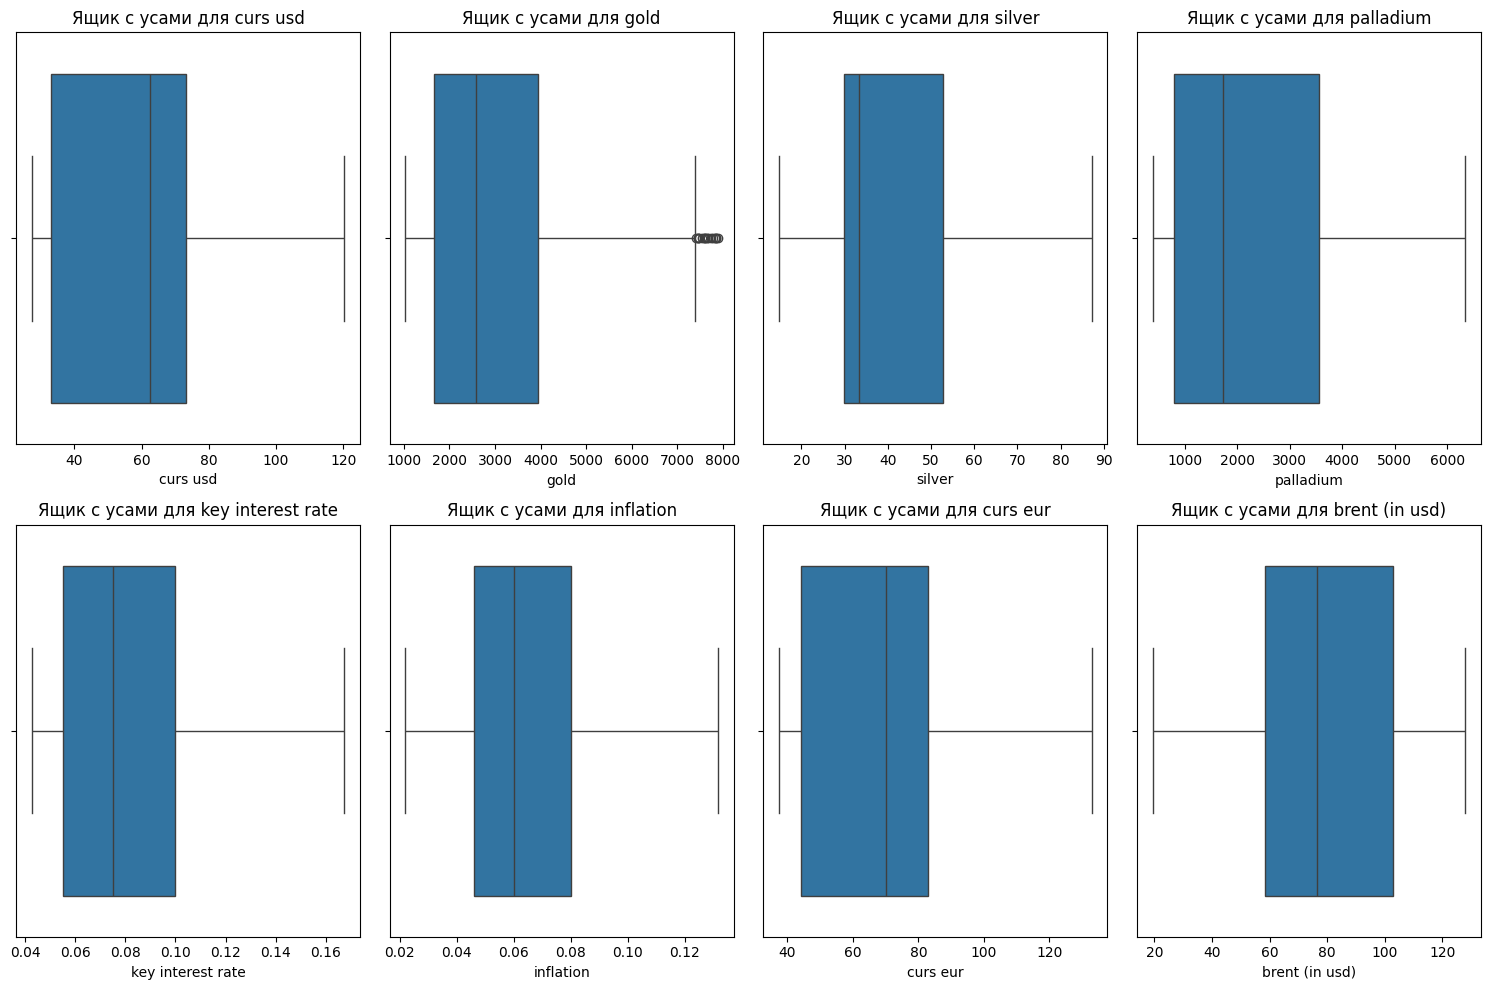

In [ ]:
# Рисуем графики, чтоб проверить устранение выбросов
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_d1.columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df_d1[col])
    plt.title(f'Ящик с усами для {col}')
plt.tight_layout()
plt.show()

Как по графикам видно, везде выбросы исчезли, кроме золота, у золота остались незначительные выбросы. Оставшиеся выбросы у золота — результат комбинации консервативного метода обработки (медиана вместо клиппинга*) и естественной устойчивости его цены, которая иногда дает редкие, но заметные отклонения.

*Клиппинг (clipping) — это метод обработки выбросов, при котором все значения, выходящие за заданные границы, "подрезаются" (заменяются на эти границы)

Далее нам следует построить матрицы корреляций для df_d1 и df_d2, чтобы выявить зависимость признаков

Строим матрицы корреляций

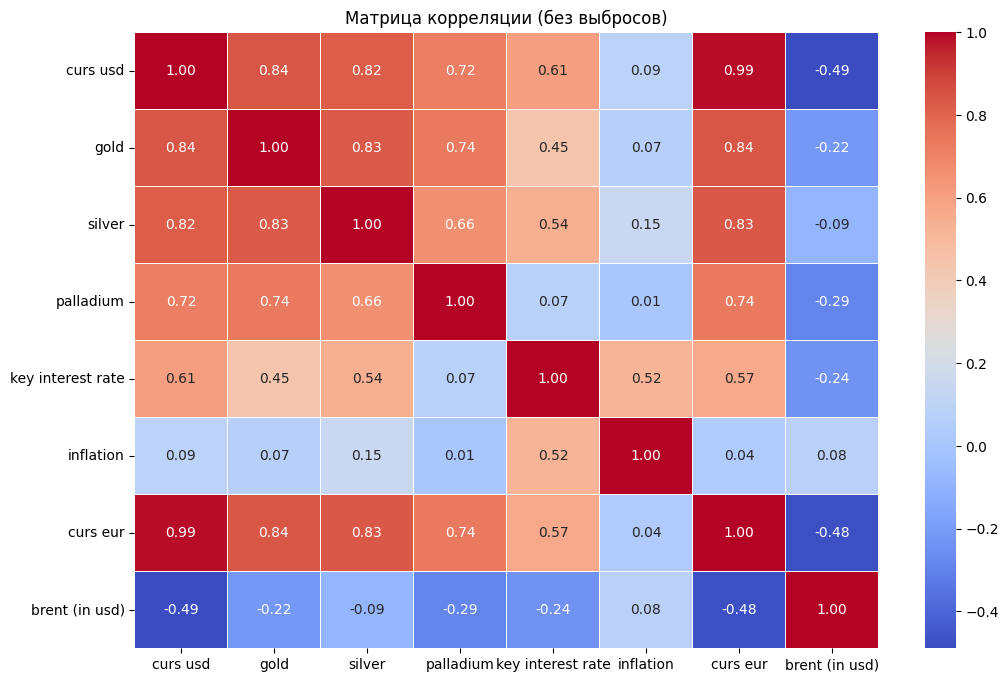

In [ ]:
# Строим тепловую карту корреляций (для 1-ой модели)
plt.figure(figsize=(12, 8))
corr_matrix1 = df_d1.corr(numeric_only=True)  # Только числовые колонки
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции (без выбросов)")
plt.show()

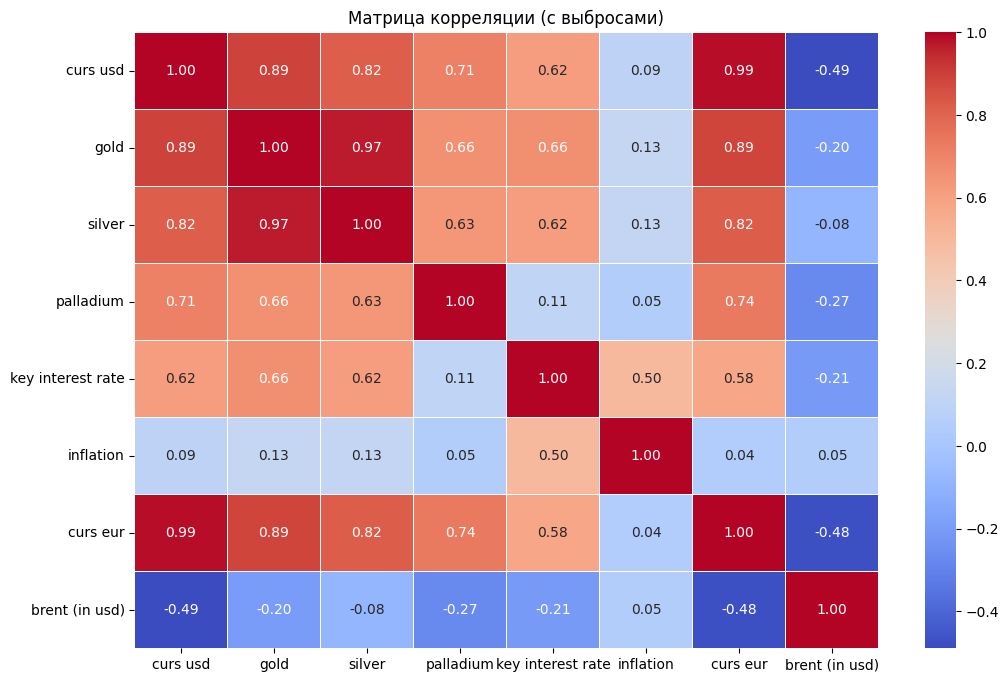

In [ ]:
# для модели с выбросами (df_d2)
plt.figure(figsize=(12, 8))
corr_matrix2 = df_d2.corr(numeric_only=True)
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции (с выбросами)")
plt.show()

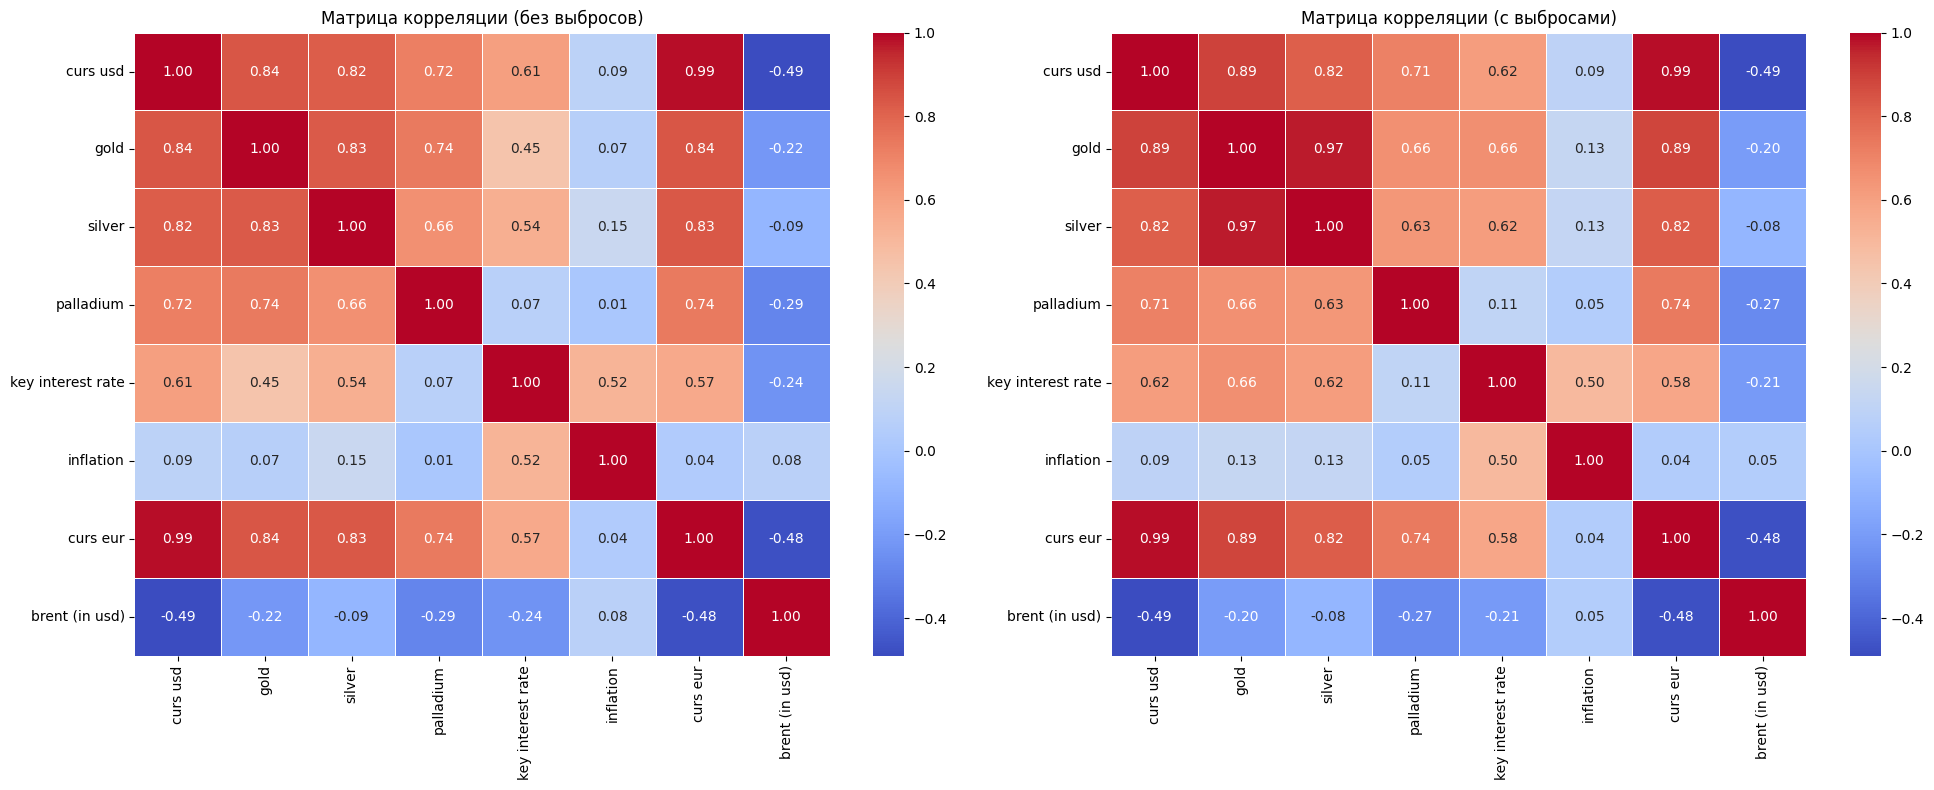

In [ ]:
plt.figure(figsize=(20, 8))
# Первая матрица (без выбросов) — СЛЕВА
plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, позиция 1
corr_matrix1 = df_d1.corr(numeric_only=True)
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции (без выбросов)")
# Вторая матрица (с выбросами) — СПРАВА
plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, позиция 2
corr_matrix2 = df_d2.corr(numeric_only=True)
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции (с выбросами)")
plt.tight_layout()  # Чтобы избежать наложения заголовков
plt.show()

Сравнение корреляционных матриц

Матрица для df_d2 (с выбросами):

curs usd и curs eur: 0.99

curs usd и gold: 0.89

curs usd и silver: 0.82

curs usd и palladium: 0.71

curs usd и key interest rate: 0.62

curs usd и inflation: 0.09

curs usd и brent (in usd): -0.49

Между драгметаллами: gold и silver — 0.97, gold и palladium — 0.66, silver и palladium — 0.63

=============================================================================================

Матрица для df_d1 (с обработанными выбросами):

curs usd и curs eur: 0.99 (без изменений)

curs usd и gold: 0.84 (снижение с 0.89)

curs usd и silver: 0.82 (без изменений)

curs usd и palladium: 0.72 (увеличение с 0.71)

curs usd и key interest rate: 0.61 (снижение с 0.62)

curs usd и inflation: 0.09 (без изменений)

curs usd и brent (in usd): -0.49 (без изменений)

Между драгметаллами: gold и silver — 0.83 (снижение с 0.97), gold и palladium — 0.74 (увеличение с 0.66), silver и palladium — 0.66 (увеличение с 0.63)

Корреляционные матрицы для df_d1 (с обработанными выбросами) и df_d2 (с необработанными выбросами) различаются, что ожидаемо после обработки выбросов

Корреляция curs usd с gold снизилась с 0.89 до 0.84, что указывает на влияние выбросов в gold на эту зависимость.
Корреляция между gold и silver уменьшилась с 0.97 до 0.83, что снижает мультиколлинеарность между драгметаллами.
Корреляция curs usd с palladium слегка увеличилась (с 0.71 до 0.72), а с key interest rate немного снизилась (с 0.62 до 0.61).
Высокая корреляция curs usd с curs eur (0.99) осталась неизменной, подтверждая избыточность curs eur как признака.
Слабая связь curs usd с inflation (0.09) и brent (in usd) (-0.49) не изменилась.
Обработка выбросов в df_d1 повлияла на корреляции, особенно для признаков с выбросами (gold, palladium), что делает данные более устойчивыми для моделирования

(Рекомендуется исключить curs eur из-за высокой корреляции и рассмотреть выбор одного драгметалла (например, gold) для уменьшения мультиколлинеарности)

Проверка структуры данных

In [ ]:
# Проверка структуры данных для df_d1

print("Первые 5 строк данных:\n", df_d1.head())
print("\nИнформация о данных:\n")
df_d1.info()
# Проверка дней недели (0 - понедельник, 6 - воскресенье)
days_of_week = df_d1.index.dayofweek
print("\nРаспределение дней недели:\n", days_of_week.value_counts())
# Список праздничных дней в России (фиксированные даты)
russian_holidays = [
    *[(f"{year}-01-{day:02d}") for year in range(2010, 2026) for day in range(1, 8)],  # 1-7 января
    *[f"{year}-02-23" for year in range(2010, 2026)],  # 23 февраля
    *[f"{year}-03-08" for year in range(2010, 2026)],  # 8 марта
    *[f"{year}-05-01" for year in range(2010, 2026)],  # 1 мая
    *[f"{year}-05-09" for year in range(2010, 2026)],  # 9 мая
    *[f"{year}-06-12" for year in range(2010, 2026)],  # 12 июня
    *[f"{year}-11-04" for year in range(2010, 2026)],  # 4 ноября
]
holidays = pd.to_datetime(russian_holidays)
# Проверка на наличие праздничных дней
holiday_check = df_d1.index.isin(holidays)
print("Количество праздничных дней в данных:", holiday_check.sum())

Первые 5 строк данных:
             curs usd     gold  silver  palladium  key interest rate  \
data                                                                  
2010-02-02   30.3996  1057.51   15.92     409.52              0.055   
2010-02-03   30.1830  1081.03   15.75     421.16              0.055   
2010-02-04   29.8779  1074.43   16.12     428.43              0.055   
2010-02-05   30.0054  1063.58   16.20     414.82              0.055   
2010-02-06   30.4666  1030.70   15.80     379.08              0.055   

            inflation  curs eur  brent (in usd)  
data                                             
2010-02-02       0.06   42.2190           78.11  
2010-02-03       0.06   42.0510           78.87  
2010-02-04       0.06   41.7633           78.57  
2010-02-05       0.06   41.6115           78.71  
2010-02-06       0.06   41.7179           80.77  

Информация о данных:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744 entries, 2010-02-02 to 2025-03-22
Data columns 

In [ ]:
# Проверка структуры данных для df_d2

print("Первые 5 строк данных:\n", df_d2.head())
print("\nИнформация о данных:\n")
df_d2.info()
# Проверка дней недели (0 - понедельник, 6 - воскресенье)
days_of_week = df_d2.index.dayofweek
print("\nРаспределение дней недели:\n", days_of_week.value_counts())
# Список праздничных дней в России (фиксированные даты)
russian_holidays = [
    *[(f"{year}-01-{day:02d}") for year in range(2010, 2026) for day in range(1, 8)],  # 1-7 января
    *[f"{year}-02-23" for year in range(2010, 2026)],  # 23 февраля
    *[f"{year}-03-08" for year in range(2010, 2026)],  # 8 марта
    *[f"{year}-05-01" for year in range(2010, 2026)],  # 1 мая
    *[f"{year}-05-09" for year in range(2010, 2026)],  # 9 мая
    *[f"{year}-06-12" for year in range(2010, 2026)],  # 12 июня
    *[f"{year}-11-04" for year in range(2010, 2026)],  # 4 ноября
]
holidays = pd.to_datetime(russian_holidays)
# Проверка на наличие праздничных дней
holiday_check = df_d2.index.isin(holidays)
print("Количество праздничных дней в данных:", holiday_check.sum())

Первые 5 строк данных:
             curs usd     gold  silver  palladium  key interest rate  \
data                                                                  
2010-02-02   30.3996  1057.51   15.92     409.52              0.055   
2010-02-03   30.1830  1081.03   15.75     421.16              0.055   
2010-02-04   29.8779  1074.43   16.12     428.43              0.055   
2010-02-05   30.0054  1063.58   16.20     414.82              0.055   
2010-02-06   30.4666  1030.70   15.80     379.08              0.055   

            inflation  curs eur  brent (in usd)  
data                                             
2010-02-02       0.06   42.2190           78.11  
2010-02-03       0.06   42.0510           78.87  
2010-02-04       0.06   41.7633           78.57  
2010-02-05       0.06   41.6115           78.71  
2010-02-06       0.06   41.7179           80.77  

Информация о данных:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744 entries, 2010-02-02 to 2025-03-22
Data columns 

# Машинное обучение

Для прогнозирования валют в комбинированной регрессионной модели нам нужно выбрать модели, которые хорошо работают с временными рядами и могут учитывать как исторические данные, так и внешние экономические факторы

Подходящие модели для прогноза курса валют:

*ARIMA (AutoRegressive Integrated Moving Average)* - Это классическая модель для временных рядов. Хорошо учитывает тренды, сезонность и автокорреляцию. Подходит как базовая модель для комбинированного подхода.

*LSTM (Long Short-Term Memory)* - Рекуррентная нейронная сеть, идеально подходящая для временных рядов. Улавливает долгосрочные зависимости, что важно для сложных паттернов валютных курсов.

*SVR (Support Vector Regression)* - Эффективна для нелинейных данных. Обладает хорошей обобщающей способностью, что полезно для прогнозирования валют.

*Random Forest (Случайный лес)* - Ансамблевая модель, которая улавливает нелинейные зависимости и взаимодействия между признаками. Проста в использовании и даёт хорошие результаты.

*XGBoost* - Ещё одна мощная ансамблевая модель. Отлично работает с большим количеством признаков и часто показывает высокую точность в регрессионных задачах.

Для комбинированной модели мы можем объединить предсказания этих моделей (например, через усреднение), чтобы повысить точность прогноза

df_d1 и df_d2 содержат одинаковые столбцы. Мы добавим лаговые признаки, чтобы модели могли учитывать прошлые значения курса

Лаговые признаки добавляются в данные для того, чтобы модели могли учитывать исторические значения целевой переменной при прогнозировании

In [ ]:
# Функция для добавления лаговых признаков
def add_lags(df, target_column, n_lags):
    for i in range(1, n_lags + 1):
        df[f'{target_column}_lag{i}'] = df[target_column].shift(i)
    return df
# Добавляем лаговые признаки (за 7 дней)
n_lags = 7
df_d1 = add_lags(df_d1, 'curs usd', n_lags)
df_d2 = add_lags(df_d2, 'curs usd', n_lags)

In [ ]:
# Удаляем строки с NaN (на всякий случай, если они на этапе обработки данных вдруг не удалились)
df_d1 = df_d1.dropna()
df_d2 = df_d2.dropna()

In [ ]:
'''
df_d1.info()
df_d1.describe()
'''

'\ndf_d1.info()\ndf_d1.describe()\n'

In [ ]:
'''
df_d2.info()
df_d2.describe()
''' 

'\ndf_d2.info()\ndf_d2.describe()\n'

In [ ]:
# df_d1

In [ ]:
# df_d2

Лаговые признаки добавляются в данные для того, чтобы модели могли учитывать исторические значения целевой переменной (в данном случае curs usd) при прогнозировании. Это особенно важно для временных рядов, таких как курс валют, по нескольким причинам:

Учёт автокорреляции:
Курс валют часто зависит от своих прошлых значений. Например, сегодняшняя цена доллара может быть связана с ценой вчера или позавчера. Лаговые признаки (например, curs usd_lag1, curs usd_lag2) позволяют модели уловить эту зависимость.

Дополнение информации:
Без лаговых признаков модель опирается только на текущие значения других признаков (gold, key interest rate, inflation, brent (in usd)). Но валюта часто демонстрирует инерционность — её движение зависит от предыдущих значений. Лаги добавляют эту информацию в данные.

Улучшение предсказательной способности:
Модели машинного обучения (например, линейная регрессия, случайный лес, SVR, нейронные сети) не имеют встроенной памяти о прошлых значениях, в отличие от специализированных моделей временных рядов (например, ARIMA или LSTM). Лаговые признаки компенсируют это, позволяя моделям "видеть" историю.

Прогноз на несколько шагов вперёд:
При итеративном прогнозировании (как в нашем случае, на 1-7 дней вперёд) лаговые признаки позволяют модели использовать предсказанные значения для следующих шагов. Например, если мы предсказали курс на завтра, это значение становится lag1 для послезавтра.

In [ ]:
# Разделение на обучающую и тестовую выборки (80% - обучение, 20% - тест)
def split_data(df):
    train_size = int(len(df) * 0.8)
    train_data = df.iloc[:train_size]
    test_data = df.iloc[train_size:]
    X_train = train_data.drop('curs usd', axis=1)
    y_train = train_data['curs usd']
    X_test = test_data.drop('curs usd', axis=1)
    y_test = test_data['curs usd']
    return X_train, X_test, y_train, y_test
# Разделяем данные
X_train_d1, X_test_d1, y_train_d1, y_test_d1 = split_data(df_d1)
X_train_d2, X_test_d2, y_train_d2, y_test_d2 = split_data(df_d2)

In [ ]:
# Импортируем необходимые библиотеки
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Модели для df_d1
# Линейная регрессия
lr_model_d1 = LinearRegression() # Создаём объект модели линейной регрессии
lr_model_d1.fit(X_train_d1, y_train_d1) # обучаем модель линейной регрессии на обучающих данных (y_train_d1 — целевая переменная (курс доллара curs usd))
y_pred_lr_d1 = lr_model_d1.predict(X_test_d1) # Делаем предсказания на тестовой выборке X_test_d1 с помощью обученной модели

# Случайный лес
rf_model_d1 = RandomForestRegressor(n_estimators=500, random_state=42) # Создаём объект модели случайного леса rf_model_d1 с помощью класса RandomForestRegressor
# (n_estimators=500 — число деревьев в "лесу" (чем больше, тем точнее, но дольше обучение), random_state=42 — случайное начальное состояние)
rf_model_d1.fit(X_train_d1, y_train_d1) # обучаем модель 
y_pred_rf_d1 = rf_model_d1.predict(X_test_d1) # предсказания

# SVR (метод опорных векторов)
svr_model_d1 = SVR(kernel='rbf') # Создаем модель SVR (kernel='rbf' — используем радиально-базисное ядро (RBF), которое хорошо подходит для нелинейных зависимостей)
# SVR пытается найти гиперплоскость, которая наилучшим образом предсказывает значения, минимизируя ошибку
svr_model_d1.fit(X_train_d1, y_train_d1) # обучаем модель 
y_pred_svr_d1 = svr_model_d1.predict(X_test_d1) # предсказания

# Нейросеть
nn_model_d1 = Sequential([ # Создаём объект нейросети nn_model_d1 с помощью класса Sequential
    # sequential означает что слои нейросети добавляются последовательно
    Dense(64, activation='relu', input_shape=(X_train_d1.shape[1],)), # первый слой
    # activation='relu' — функция активации relu (Rectified Linear Unit), которая делает модель нелинейной
    # То есть, если значение положительное — оно остаётся, если отрицательное — становится нулём
    # Это помогает нейронной сети учиться нелинейным зависимостям в данных
    # input_shape=(X_train_d1.shape[1],) — размер входных данных (число признаков в X_train_d1)
    # X_train_d1.shape[1] — это число признаков (колонок) в этих данных
    # Например, если 10 признаков (столбцов), будет input_shape=(10,)
    # Круглая скобка с запятой (10,) — это кортеж с одним элементом, как требует Keras
    Dense(32, activation='relu'), # второй слой
    Dense(1) # слой с одним нейроном (без активации), который выдаёт предсказание (число — курс доллара)
])
'''
X_train_d1.shape[0] — это сколько строк (примеров/наблюдений)
X_train_d1.shape[1] — это сколько колонок (признаков)
'''
nn_model_d1.compile(optimizer='adam', loss='mse') # компиляция модели
# optimizer='adam' — используем оптимизатор Adam
# loss='mse' — функция потерь "среднеквадратичная ошибка"
nn_model_d1.fit(X_train_d1, y_train_d1, epochs=50, batch_size=32, verbose=0) # обучение нейросетевой модели
'''
Обучаем нейронную сеть:
epochs=50 — сеть обучается в течение 50 проходов по всем данным
batch_size=32 — данные разбиваются на батчи по 32 примера чтобы ускорить обучение
verbose=0 — отключаем вывод прогресса обучения (чтобы не загромождать вывод всяким хламом)
'''
y_pred_nn_d1 = nn_model_d1.predict(X_test_d1, verbose=0).flatten() # предсказание
# .flatten() — преобразуем массив из формы (n_samples, 1) в одномерный массив (n_samples,) для удобства работы с другими моделями

In [ ]:
# Аналогично для df_d2
# Линейная регрессия
lr_model_d2 = LinearRegression()
lr_model_d2.fit(X_train_d2, y_train_d2)
y_pred_lr_d2 = lr_model_d2.predict(X_test_d2)

# Случайный лес
rf_model_d2 = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model_d2.fit(X_train_d2, y_train_d2)
y_pred_rf_d2 = rf_model_d2.predict(X_test_d2)

# SVR
svr_model_d2 = SVR(kernel='rbf')
svr_model_d2.fit(X_train_d2, y_train_d2)
y_pred_svr_d2 = svr_model_d2.predict(X_test_d2)

# Нейросеть
nn_model_d2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_d2.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model_d2.compile(optimizer='adam', loss='mse')
nn_model_d2.fit(X_train_d2, y_train_d2, epochs=50, batch_size=32, verbose=0)
y_pred_nn_d2 = nn_model_d2.predict(X_test_d2, verbose=0).flatten()

In [ ]:
# Комбинированные предсказания для df_d1
y_pred_combined_d1 = (y_pred_lr_d1 + y_pred_rf_d1 + y_pred_svr_d1 + y_pred_nn_d1) / 4
print(y_pred_combined_d1)
# Комбинированные предсказания для df_d2
y_pred_combined_d2 = (y_pred_lr_d2 + y_pred_rf_d2 + y_pred_svr_d2 + y_pred_nn_d2) / 4
print(y_pred_combined_d2)

[100.91951131  99.61644293  98.64883298  98.43917492  97.75960242
  95.86381825  93.9416881   92.99206056  88.99877972  85.84595711
  84.46237015  82.93509104  82.75127481  82.28382789  81.60951956
  79.68259624  77.13500592  76.35925489  77.61316627  78.75908401
  79.95585083  79.70061569  79.00654748  79.00868198  78.01252396
  76.36105695  75.10474498  74.05814514  73.61541507  73.02056301
  72.6821414   71.99674269  70.61877472  69.05021049  67.88180384
  68.16466525  68.08249534  66.46977759  65.59553652  64.94778905
  64.83153311  64.51117587  63.36323725  61.46378472  60.82564761
  59.97950256  60.2180436   63.44608284  64.07620209  63.45769221
  62.97592676  62.98163789  63.32450892  63.34372918  62.69441931
  62.62326717  61.99319669  60.99063651  60.53419988  60.10569603
  59.61091834  59.62297387  59.39445366  58.92617349  58.16689904
  57.75439584  57.48148676  57.27746969  56.90739504  56.46300183
  56.01449899  56.70186509  56.96405581  58.21369462  60.2604497
  62.330585

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error # импорт метрик
def calculate_metrics(y_true, predictions, model_names): # определение функции
    for y_pred, name in zip(predictions, model_names): # цикл по прогнозам и именам моделей
        r2 = r2_score(y_true, y_pred) # расчет R^2
        mae = mean_absolute_error(y_true, y_pred) # расчет MAE
        mape = mean_absolute_percentage_error(y_true, y_pred) * 100 # расчет MAPE в процентах
        mse = mean_squared_error(y_true, y_pred) # расчет MSE
        rmse = sqrt(mse) # расчет RMSE
        print(f"Метрики для {name}:") # вывод заголовка
        print(f"R²: {r2:.4f}") # вывод R^2
        print(f"MAE: {mae:.4f}") # вывод MAE
        print(f"MAPE: {mape:.2f}%") # вывод MAPE
        print(f"MSE: {mse:.4f}") # вывод MSE
        print(f"RMSE: {rmse:.4f}") # вывод RMSE
        print() # добавление пустой строки
# Список прогнозов и имен моделей для df_d1
predictions_d1 = [y_pred_lr_d1, y_pred_rf_d1, y_pred_svr_d1, y_pred_nn_d1, y_pred_combined_d1] # список прогнозов для df_d1
model_names_d1 = ["линейной регрессии", "случайного леса", "SVR (метод опорных векторов)", "нейронной сети", "комбинированной модели"] # список имен моделей
# Вычисление метрик для df_d1
print('Расчет метрик для df_d1:\n')
calculate_metrics(y_test_d1, predictions_d1, model_names_d1) # вызов функции для df_d1

Расчет метрик для df_d1:

Метрики для линейной регрессии:
R²: 0.9835
MAE: 1.4538
MAPE: 1.73%
MSE: 3.2815
RMSE: 1.8115

Метрики для случайного леса:
R²: 0.8941
MAE: 3.0794
MAPE: 3.52%
MSE: 21.0038
RMSE: 4.5830

Метрики для SVR (метод опорных векторов):
R²: -0.4590
MAE: 13.2697
MAPE: 15.17%
MSE: 289.3541
RMSE: 17.0104

Метрики для нейронной сети:
R²: 0.4937
MAE: 6.1002
MAPE: 6.94%
MSE: 100.4130
RMSE: 10.0206

Метрики для комбинированной модели:
R²: 0.8125
MAE: 3.5086
MAPE: 3.88%
MSE: 37.1911
RMSE: 6.0985



In [ ]:
print('Расчет метрик для df_d2:\n')
predictions_d2 = [y_pred_lr_d2, y_pred_rf_d2, y_pred_svr_d2, y_pred_nn_d2, y_pred_combined_d2] # список прогнозов для df_d2
model_names_d2 = ["линейной регрессии", "случайного леса", "SVR (метод опорных векторов)", "нейронной сети", "комбинированной модели"] # список имен моделей
# Вычисление метрик для df_d2
calculate_metrics(y_test_d2, predictions_d2, model_names_d2) # вызов функции для df_d2

Расчет метрик для df_d2:

Метрики для линейной регрессии:
R²: 0.9838
MAE: 1.4036
MAPE: 1.67%
MSE: 3.2034
RMSE: 1.7898

Метрики для случайного леса:
R²: 0.9642
MAE: 2.0310
MAPE: 2.34%
MSE: 7.0985
RMSE: 2.6643

Метрики для SVR (метод опорных векторов):
R²: -0.3201
MAE: 12.9852
MAPE: 14.91%
MSE: 261.8160
RMSE: 16.1807

Метрики для нейронной сети:
R²: 0.1425
MAE: 10.4740
MAPE: 11.95%
MSE: 170.0564
RMSE: 13.0406

Метрики для комбинированной модели:
R²: 0.9574
MAE: 2.3349
MAPE: 2.89%
MSE: 8.4473
RMSE: 2.9064

